In [1]:
from scipy import signal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
d = pd.read_csv('data/data_2017-02-26-22.34.11.csv')
d.head()

,timestamps,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Marker
0,1.488148e+09,9.804,12.959,12.435,9.152,0
1,1.488148e+09,15.775,18.724,21.454,19.274,0
2,1.488148e+09,11.631,13.896,12.194,13.884,0
3,1.488148e+09,13.604,11.203,12.413,10.922,0
4,1.488148e+09,10.657,11.986,7.872,12.600,0


In [21]:
X = np.array(d.ix[:, 1:5])

In [23]:
# b, a = signal.butter(5, (8.0/125.0, 40.0/125), btype='bandpass')

# x = d.channel_0.values
# sig_f = signal.lfilter(b, a, x)
# sig = sig_f[500:]
sig = X[:, 1]
sig.shape

(228,)

In [24]:
# freq, y = signal.welch(sig, fs=250.0)
fft = np.log(np.abs(np.fft.rfft(sig)))
fftfreq = np.fft.rfftfreq(len(sig), d=1/250.0)

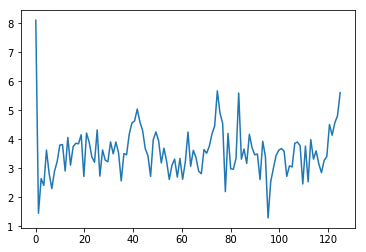

In [25]:
# plt.plot(freq, y)
plt.plot(fftfreq, fft)

In [26]:
fftfreq, fft = signal.welch(sig, fs=200.0)

/home/pierre/.local/lib/python3.6/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 256, is greater than input length = 228, using nperseg = 228
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


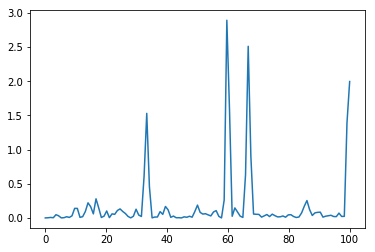

In [27]:
plt.plot(fftfreq, fft)

In [28]:
b, a = signal.butter(8, (6.5/100.0, 40.0/100), btype='bandpass')
sig_f = signal.lfilter(b, a, sig)[1000:]

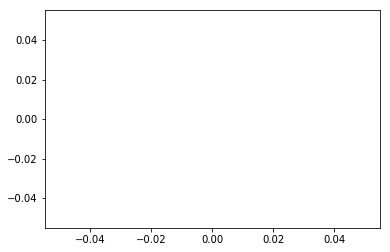

In [29]:
plt.plot(sig_f)


(5, 40)

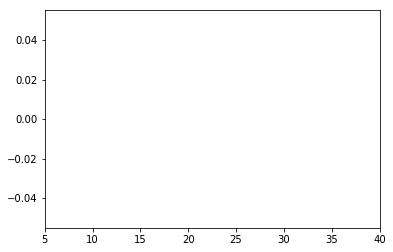

In [30]:
fftfreq, fft = signal.welch(sig_f, fs=250.0)
plt.plot(fftfreq, fft)
plt.xlim(5, 40)

/home/pierre/.local/lib/python3.6/site-packages/scipy/signal/spectral.py:772: UserWarning: nperseg = 256, is greater than input length = 228, using nperseg = 228
  'using nperseg = {1:d}'.format(nperseg, x.shape[-1]))


(0, 8000)

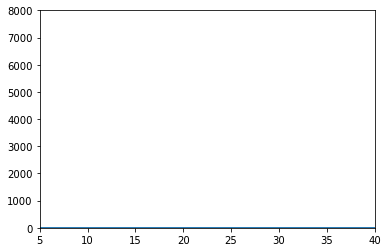

In [31]:
fftfreq, fft = signal.welch(sig, fs=250.0)
plt.plot(fftfreq, fft)
plt.xlim(5, 40)
plt.ylim(0, 8000)

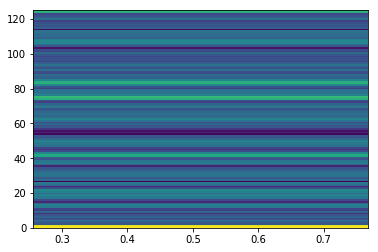

In [32]:
_ = plt.specgram(sig, Fs=250.0)

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:7222: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/usr/lib/python3.6/site-packages/matplotlib/colors.py:821: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/pierre/.local/lib/python3.6/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


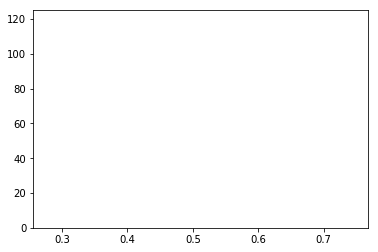

In [33]:
_ = plt.specgram(sig_f, Fs=250.0, NFFT=256, noverlap=128)